In [74]:
#Alexandre Marques Uchôa

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline 

##Parte 1

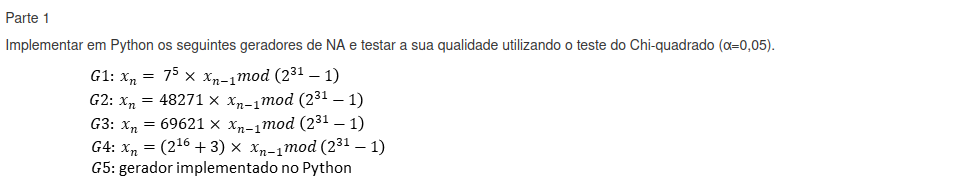

###Sobre os Geradores:
O valor p1 é o valor fixo 7⁵ já calculado.

O valor p2 é o valor fixo (2³¹ - 1) já calculado.

O estado inicial de anterior é a seed dos geradores. 

Todos os geradores retornam o último valor gerado(atual) e o array de valores gerados(np.array(vet_rn)).


In [75]:
def G1(n):
    #Fixos
    p1 = 16807 #7⁵
    p2 = 2147483647 # (2³¹ - 1)

    anterior = 1030 #Seed.
    atual = 0 

    vet_rn = []
    
    for i in range(1,n+1,1):
        atual = (p1* anterior)%p2
        anterior = atual

        vet_rn.append(atual)
    
    return atual, np.array(vet_rn)

In [76]:
def G2(n):
    #Fixos
    p1 = 48271
    p2 = 2147483647 # (2³¹ - 1)

    anterior = 1030 #Seed.
    atual = 0 

    vet_rn = []
    
    for i in range(1,n+1,1):
        atual = (p1* anterior)%p2
        anterior = atual

        vet_rn.append(atual)
    
    return atual, np.array(vet_rn)

In [77]:
def G3(n):
    #Fixos
    p1 = 69621
    p2 = 2147483647 # (2³¹ - 1)

    anterior = 1030 #Seed.
    atual = 0 

    vet_rn = []

    for i in range(1,n+1,1):
        atual = (p1* anterior)%p2
        anterior = atual

        vet_rn.append(atual)
    
    return atual, np.array(vet_rn)

In [78]:
def G4(n):
    #Fixos
    p1 = 65539 # (2¹⁶ + 3)
    p2 = 2147483647 # (2³¹ - 1)

    anterior = 1030 #Seed.
    atual = 0 

    vet_rn = []

    for i in range(1,n+1,1):
        atual = (p1* anterior)%p2
        anterior = atual

        vet_rn.append(atual)

    return atual, np.array(vet_rn)

In [79]:
def G5(n):
    random.seed(1030)

    vet_rn = []
    for i in range(0,n+1,1):
        vet_rn.append(random.random())
    
    return(vet_rn[len(vet_rn)-1], np.array(vet_rn)) 

Aqui coletam-se um array de variáveis de tamanho N e as divide pelo módulo, dando origem a gx_vet

In [80]:
N=5000

g1, g1_vet = G1(N)
g2, g2_vet = G2(N)
g3, g3_vet = G3(N)
g4, g4_vet = G4(N)
g5, g5_vet = G5(N)

mod = 2147483647 # (2³¹ - 1)

g1_vet = g1_vet/mod
g2_vet = g2_vet/mod
g3_vet = g3_vet/mod
g4_vet = g4_vet/mod
g5_vet = g5_vet/mod


###Sobre a função freq_vet

É uma função que calcula como os números gerados estão distribuidos.

Ela funciona da seguinte forma: 
1. Faz-se um vetor auxiliar preenchido de zeros de tamanho K.
2. Divide-se o valor i pego do vetor vet pela propabilidade ideal de distribuição 1/K
3. Adiciona soma-se 1 ao vetor auxiliar onde aquela variável está localizada no intervalo.

Ou seja, o vetor auxiliar vai servir para contar a quantidade de valores dispostos naquele intervalo.

In [81]:
def freq_vet(vet, K):
    f_vet = np.zeros(K)

    for i in vet:
        j = int(i/(1/K))
        f_vet[j] += 1
    
    return f_vet

Aqui faz-se um vetor de frequências para cada amostra gx_vet, dando origem ao vetor gx_freq_vet.

In [82]:
K=1000

g1_freq_vet = freq_vet(g1_vet,K)
g2_freq_vet = freq_vet(g2_vet,K)
g3_freq_vet = freq_vet(g3_vet,K)
g4_freq_vet = freq_vet(g4_vet,K)
g5_freq_vet = freq_vet(g5_vet,K)

###Sobre a função ChiSquare

Função tirada diretamente do slide "Notas de aula 02".

Ela é uma função que retorna o valor D. Esse valor indica se a lista de variáveis mandadas para a função seguem uma distribuição de probabilidade linear(ej). Ou seja, se há uma lista de 5 números, ela calcula se a distribuição entre esses 5 é 1/5.

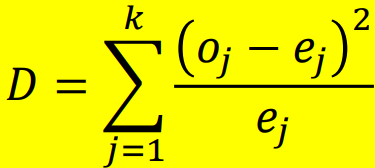

In [83]:
def chisquare(vet, prob, N):
    vet = vet/N
    prob = prob/N
    D = 0
    for i in range(0,len(vet)):
        D += (((vet[i]-prob)**2)/prob)
    return D

O valor Table_value é o valor de 95% de certeza de 1000 graus de liberdade (não achei o de 999).

Esse valor é comparado com o valor D. Se ele for maior que D, significa que pode se afirmar que as variáveis possuem um padrão de distribuição linear entre [0,1].

Aqui calcula-se o chisquare de cada gx_freq_vet, com probabilidade prob = N/K, dando origem a Dx. Dx é comparado com Table_value para conferir se aquela amostra passou no teste chisquare.

In [84]:
prob = N/K

Table_value=1074.679

D1_Value = chisquare(g1_freq_vet,prob,N)
D2_Value = chisquare(g2_freq_vet,prob,N)
D3_Value = chisquare(g3_freq_vet,prob,N)
D4_Value = chisquare(g4_freq_vet,prob,N)
D5_Value = chisquare(g5_freq_vet,prob,N)

print("D1: ",D1_Value, " D<X² = ", Table_value > D1_Value)
print("D2: ",D2_Value, " D<X² = ", Table_value > D2_Value)
print("D3: ",D3_Value, " D<X² = ", Table_value > D3_Value)
print("D4: ",D4_Value, " D<X² = ", Table_value > D4_Value)
print("D5: ",D5_Value, " D<X² = ", Table_value > D5_Value)

D1:  0.18903999999999987  D<X² =  True
D2:  0.2088800000000002  D<X² =  True
D3:  0.1928000000000002  D<X² =  True
D4:  0.19271999999999975  D<X² =  True
D5:  999.3996399999763  D<X² =  True


D1,D2,D3,D4 e D5 Passaram

##Parte 2

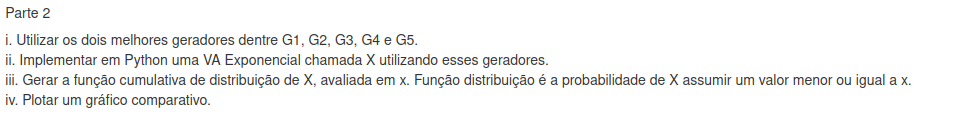

###Sobre a função random_list:


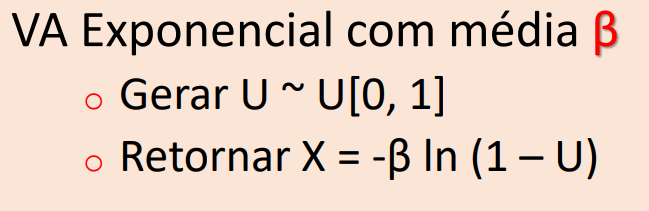

###Sobre randim_list:
É a implementaração da variavel aleatória X da imagem acima.

random_list gerará uma lista de variáveis aleatórias Exponenciais Ts.

In [85]:
def random_list(vet,B):
    Ts = np.zeros(len(vet))
    for i in range(0,len(vet)):
        Ts[i] = -B*np.log(1-vet[i])
    return Ts

Assim como no slide, foi utilizado B=1/10.

In [86]:
B=1/10
g1_random_list = random_list(g1_vet,B)
g2_random_list = random_list(g2_vet,B)
g3_random_list = random_list(g3_vet,B)
g4_random_list = random_list(g4_vet,B)
g5_random_list = random_list(g4_vet,B)

In [87]:
def plot_cdf_1(vet, N, gen):
    data = vet 
    count, bins_count = np.histogram(data, bins=10) 
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf) 
    plt.plot(bins_count[1:], pdf, 'bo-' ,color="red", label="PDF") 
    plt.plot(bins_count[1:], cdf, 'bo-' ,label=gen+" - CDF") 
    plt.legend() 

Após passar por random_list, é possível observar que as variáveis tem origem exponencial.

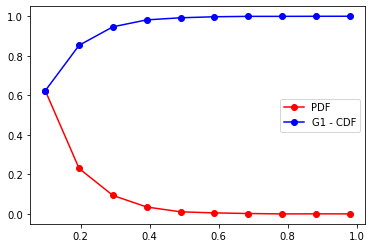

In [88]:
plot_cdf_1(g1_random_list, N, "G1")

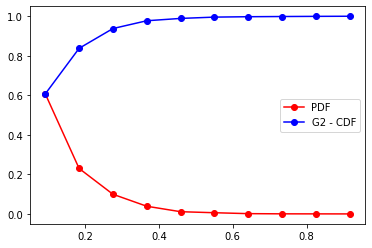

In [89]:
plot_cdf_1(g2_random_list, N, "G2")

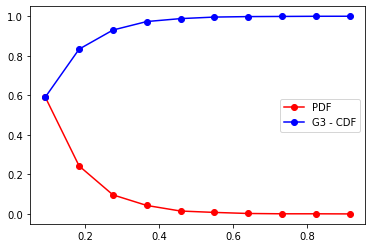

In [90]:
plot_cdf_1(g3_random_list, N ,"G3")

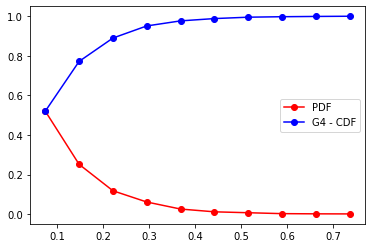

In [91]:
plot_cdf_1(g4_random_list, N , "G4")

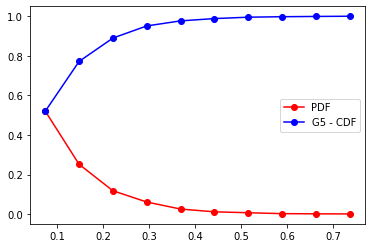

In [92]:
plot_cdf_1(g5_random_list, N , "G5")

Aqui é possível ver como ficaria uma distribuição de variáveis Lineares.

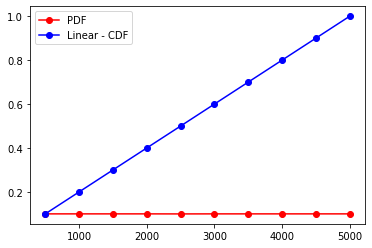

In [93]:
plot_cdf_1([*range(0,N-1)], N, "Linear")